# DSAR & VSAR plots



In [19]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import numpy as np
import pandas as pd
import scipy.signal
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [2]:
def mask_df(row):
    peaks, properties = scipy.signal.find_peaks(row, prominence=(row.rolling('10D').median()*100).to_numpy(), distance=len(row))
    row_masked = row.copy()
    try:
#         row_masked[row_masked>min(row_masked.iloc[properties['left_bases'][0]:properties['right_bases'][0]])]=np.nan
        row_masked.iloc[properties['left_bases'][0]-500:properties['right_bases'][0]+500]=np.nan
    except:
        pass
    return row_masked

In [83]:
# read txt-file with UTC times and type of activity
df_activity = pd.read_csv('../../MtStHelens_activity/mt_st_helens_activity.txt', header=1, skiprows=11)
df_activity.set_index('UTC',inplace=True)
df_activity.index = pd.to_datetime(df_activity.index).tz_localize(None)

# dome activity dataframe preparation ---------------------------------------------------------------------------------------------------
activity_dome = df_activity.copy()
activity_dome_start = activity_dome[activity_dome['activity' ]=='d'].take([0,2,3,4,5,6])
activity_dome_end = activity_dome[activity_dome['activity' ]=='ed'].take([1,2,3,4,5,6])
print(activity_dome_start, activity_dome_end)

           activity
UTC                
2004-10-11        d
2004-10-25        d
2005-01-03        d
2005-03-19        d
2005-08-06        d
2005-10-09        d            activity
UTC                
2004-10-24       ed
2004-12-18       ed
2005-03-09       ed
2005-07-18       ed
2005-10-09       ed
2006-04-01       ed


In [93]:
sta = 'allUWsta' # allUWsta, YEL_VALT
# read seismic data -------------------------------------------------------------------------------------------------------------------
# df = pd.read_csv('../data/1980_{}_extended2.csv'.format(sta)) # 1 year long
df = pd.read_csv('../data/{}_extended2_long2.csv'.format(sta))
df.set_index('time',inplace=True)
df.index = pd.to_datetime(df.index).tz_localize(None)
df_read = df.resample('10min').median()

In [94]:
def head_and_tail(df, n=2): # function to show rows from the beginning and end of the df
    return pd.concat([df.head(n), df.tail(n)])

head_and_tail(df)

,rsam,mf,hf,dsar,ldsar,vsar,rms,rmes,pgv,pga,...,zsc2_ldsar,zsc2_vsar,zsc2_rms,zsc2_rmes,zsc2_pgv,zsc2_pga,lhdsar,lhvsar,zsc2_lhdsar,zsc2_lhvsar
time,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 23:40:00,8.129698,11.363140,20.637913,1.403804,1.879541,0.666528,3.279763e-07,2.052415e-07,1.469808e-06,0.000122,...,0.726137,4.848894,0.603515,0.615680,0.657761,0.423246,2.726442,0.714780,1.454453,2.194831
2022-12-31 23:50:00,3.927294,6.949612,13.281453,1.103715,1.118566,0.574990,1.165115e-07,5.650548e-08,6.269962e-07,0.000029,...,0.508880,4.595204,0.048988,0.032803,0.063107,0.040983,1.350959,0.374586,0.835660,1.885521


In [101]:
# preprocess seismic data -------------------------------------------------------------------------------------------------------------------
df = df_read.copy()
df = df.apply(mask_df,axis=0) # remove outliers (the peak detection does not work well)

df = df.rolling('10D').median()
# df = df.rolling('1H').median()
# df = df.rolling('6H', center=True, closed='both').median()
# df = df[df.index<datetime.datetime(year,5,22)]

## DSAR vs VSAR

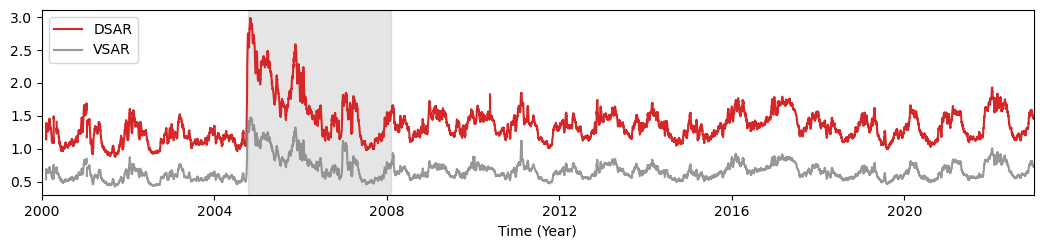

In [102]:
# crate figure LINEAR--------------------------------------------------------------------------------------------------------------------------
fig, ax2 = plt.subplots(1,1, sharex=True, figsize=(6.4*2, 4.8*0.5))

# start plototting seismic data ---------------------------------------------------------------------------------------------------------

ax2.plot(df['dsar'], label='DSAR', alpha=1, color='C3')
ax2.plot(df['vsar'], label='VSAR', alpha=0.8, color='C7')

# plot dome periodes ------------------------------------------------------------------------------------------------------------------
# sdates = [datetime.datetime(2004,9,23,9,0),datetime.datetime(2004,10,11)]
# edates = [datetime.datetime(2004,9,25,19,0),datetime.datetime(2008,2,1)]

# for (sdate,edate) in zip(sdates,edates):
#     ax2.axvspan(sdate, edate, alpha=0.2, color='gray')

# for i in [datetime.datetime(2004,10,1,19,2),datetime.datetime(2004,10,2,19,15),
#           datetime.datetime(2004,10,3,9,50),datetime.datetime(2004,10,4,16,43),datetime.datetime(2004,10,5,16,5)]:
#     ax2.axvline(i, color='k',linestyle=':')

sdate = datetime.datetime(2004,10,11)
edate = datetime.datetime(2008,2,1)
ax2.axvspan(sdate, edate, alpha=0.2, color='gray')
    
# title, legende, and scale ------------------------------------------------------------------------------------------------------------
ax2.legend(loc='upper left')


ax2.set_xlim(df.index[0], df.index[-1])
# ax2.set_xlim(datetime.datetime(2010,1,1), datetime.datetime(2011,1,1))
ax2.set_xlabel('Time (Year)')
# ax2.set_xlim(datetime.datetime(2004,9,1), datetime.datetime(2004,11,1))
# ax2.set_xlabel('Time (Year-Month-Day)')

# save plot and show -----------------------------------------------------------------------------------------------------------------
# plt.savefig('../plots/multiyear/multi_sta/{}_lin_long_dome_roll10D_nozsc_DSARvsVSAR_final2.png'.format(sta), dpi=300, bbox_inches='tight')
fig.show()

Linear regression results before eruption:
Slope (a): 0.499
Intercept (q): -0.01
R-squared: 0.96
Linear regression results during eruption:
Slope (a): 0.521
Intercept (q): -0.039
R-squared: 0.98
Linear regression results after eruption:
Slope (a): 0.557
Intercept (q): -0.098
R-squared: 0.96


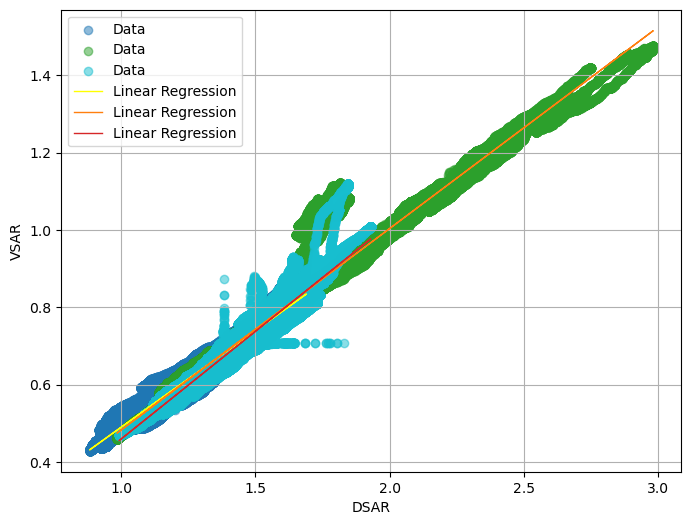

In [106]:
from scipy import stats

# Assuming you have two time series: timeserie1 and timeserie2
# Replace these with your actual time series data

timeserie1 =  df['dsar']
timeserie2 =  df['vsar']

# Mask all nan values appearing in either timeserie
mask_nan = ~np.isnan(timeserie1) & ~np.isnan(timeserie2)
masked_t1 = timeserie1[mask_nan]
masked_t2 = timeserie2[mask_nan]

# Split the time series into three parts (before, during, after eruption)
sdate = datetime.datetime(2004,9,23)
edate = datetime.datetime(2008,2,1)

# DSAR (m: masked, t: timeserie, first number indicates which timeserie, second number indicates which time period)
mt11 = masked_t1.loc[:sdate]
mt12 = masked_t1.loc[sdate:edate]
mt13 = masked_t1.loc[edate:]

# VSAR (m: masked, t: timeserie, first number indicates which timeserie, second number indicates which time period)
mt21 = masked_t2.loc[:sdate]
mt22 = masked_t2.loc[sdate:edate]
mt23 = masked_t2.loc[edate:]


# Perform linear regression
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(mt11, mt21)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(mt12, mt22)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(mt13, mt23)


# Print the results section 1
print("Linear regression results before eruption:")
print("Slope (a):", round(slope1,3))
print("Intercept (q):", round(intercept1,3))
print("R-squared:", round(r_value1**2,3))
# print("P-value:", round(p_value1,3))
# print("Standard error:", round(std_err1,3))

# Print the results section 2
print("Linear regression results during eruption:")
print("Slope (a):", round(slope2,3))
print("Intercept (q):", round(intercept2,3))
print("R-squared:", round(r_value2**2,3))
# print("P-value:", round(p_value2,3))
# print("Standard error:", round(std_err2,3))

# Print the results section 3
print("Linear regression results after eruption:")
print("Slope (a):", round(slope3,3))
print("Intercept (q):", round(intercept3,3))
print("R-squared:", round(r_value3**2,3))
# print("P-value:", round(p_value3,3))
# print("Standard error:", round(std_err3,3))

# Plot the original data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(mt11, mt21, label='Data', color='C0', alpha=0.5)
plt.scatter(mt12, mt22, label='Data', color='C2', alpha=0.5)
plt.scatter(mt13, mt23, label='Data', color='C9', alpha=0.5)
plt.plot(mt11, slope1 * mt11 + intercept1, color='yellow', label='Linear Regression', linewidth=1)
plt.plot(mt12, slope2 * mt12 + intercept2, color='C1', label='Linear Regression', linewidth=1)
plt.plot(mt13, slope3 * mt13 + intercept3, color='C3', label='Linear Regression', linewidth=1)
plt.xlabel('DSAR')
plt.ylabel('VSAR')
# plt.xlim(0,10)
# plt.ylim(0,5)
# plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


Linear regression results:
Slope (a): 0.527
Intercept (q): -0.053
R-squared: 0.976


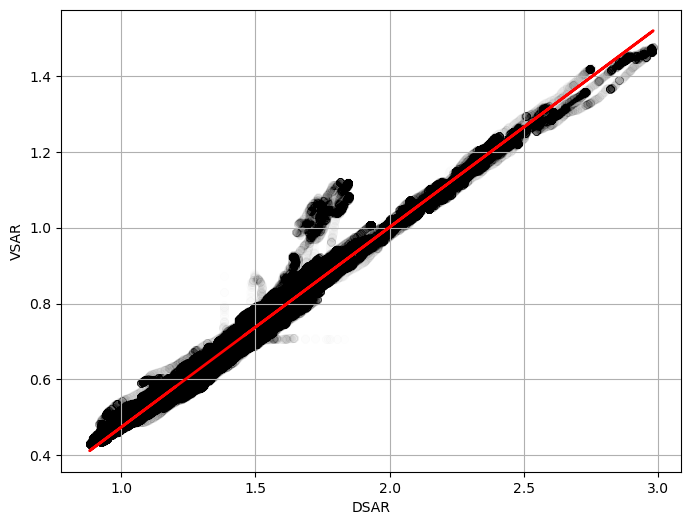

In [118]:
from scipy import stats

# Assuming you have two time series: timeserie1 and timeserie2
# Replace these with your actual time series data

timeserie1 =  df['dsar']
timeserie2 =  df['vsar']

# Mask all nan values appearing in either timeserie
mask_nan = ~np.isnan(timeserie1) & ~np.isnan(timeserie2)
masked_t1 = timeserie1[mask_nan]
masked_t2 = timeserie2[mask_nan]

# Perform linear regression
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(masked_t1, masked_t2)

# Print the results section 1
print("Linear regression results:")
print("Slope (a):", round(slope1,3))
print("Intercept (q):", round(intercept1,3))
print("R-squared:", round(r_value1**2,3))
# print("P-value:", round(p_value1,3))
# print("Standard error:", round(std_err1,3))

# Plot the original data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(masked_t1, masked_t2, color='k', alpha=0.005)
plt.scatter(np.nan, np.nan, label='Data', color='k', alpha=0.2)
plt.plot(masked_t1, slope1 * masked_t1 + intercept1, color='red', label='Linear Regression', linewidth=2)

plt.xlabel('DSAR')
plt.ylabel('VSAR')
# plt.title('Linear Regression')
# plt.legend(loc='upper left')
plt.grid(True)
# plt.savefig('../plots/multiyear/multi_sta/DSARvsVSAR_lin.png', dpi=300, bbox_inches='tight')
plt.show()


## AGU DSAR plot

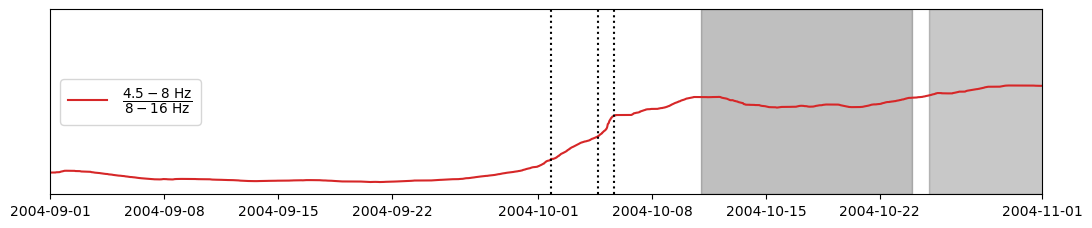

In [20]:
# crate figure AGU--------------------------------------------------------------------------------------------------------------------------
fig, (ax2) = plt.subplots(1,1, sharex=True, figsize=(6.4*2, 4.8*0.5))

# start plototting seismic data ---------------------------------------------------------------------------------------------------------
# ax1.plot(df['rsam'], label='2-5 Hz', alpha=1)
# ax1.plot(df['mf'], label='4.5-8 Hz', alpha=0.8, color='C2')
# ax1.plot(df['hf'], label='8-16 Hz', alpha=0.6, color='C8')

ax2.plot(df['dsar'], label=r'$\frac{4.5-8 \ \mathrm{Hz}}{8-16 \ \mathrm{Hz}}$', alpha=1, color='C3')

# plot dome periodes ------------------------------------------------------------------------------------------------------------------
color = cm.gray(np.linspace(0, 1, len(activity_dome_start)+2))

for i in range(len(activity_dome_start)):
    sdate = activity_dome_start.index[i].to_pydatetime() # start date
    edate = activity_dome_end.index[i].to_pydatetime() # end date
#     ax1.axvspan(sdate, edate, alpha=0.25, color=color[i])
    ax2.axvspan(sdate, edate, alpha=0.25, color=color[i])
#     ax3.axvspan(sdate, edate, alpha=0.25, color=color[i])
#     ax4.axvspan(sdate, edate, alpha=0.25, color=color[i])

for i in [datetime.datetime(2004,10,1,19,2),datetime.datetime(2004,10,4,16,43),datetime.datetime(2004,10,5,16,5)]:
#     ax1.axvline(i, color='k',linestyle=':')
    ax2.axvline(i, color='k',linestyle=':')
#     ax3.axvline(i, color='k',linestyle=':')
#     ax4.axvline(i, color='k',linestyle=':')

    
# title, legende, and scale ------------------------------------------------------------------------------------------------------------
# ax1.set_title('Station {}'.format(sta))
# ax1.legend(loc='center left')
ax2.legend(loc='center left', fontsize=14)

# linear y-axis
# ax1.set_yscale('log')
# ax2.set_yscale('log')
# ax1.set_yticks([])
ax2.set_yticks([])
# ax2.set_yticks([], minor=True)
# ax1.set_ylim(0,3e3)
# ax2.set_ylim(5e-1,5e0)
# ax1.set_ylim(0,1250)
ax2.set_ylim(0.8,4.5)

# ax1.set_xlim(df.index[0], df.index[-1])
ax2.set_xlim(datetime.datetime(2004,9,1), datetime.datetime(2004,11,1))

# save plot and show -----------------------------------------------------------------------------------------------------------------
# plt.savefig('../plots/multiyear/multi_sta/DSAR_{}_lin_short_dome_roll1H_AGU2.png'.format(sta), dpi=300, bbox_inches='tight')
fig.show()